# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [27]:
# Your work here:

#Importing the necessary visualization and statistical packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import statistics
import pylab
import math

df = pd.read_csv('data/human_body_temperature.csv')

### Question 1:  Is the distribution of body temperatures normal?

In [2]:
#Explorting the dataframe
print(df.shape)
print('This dataset has ' + str(len(df.temperature)) + ' observations.')

print(df.describe())
df.head()

(130, 3)
This dataset has 130 observations.
       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


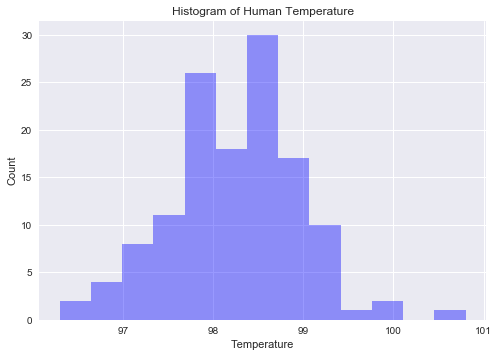

In [3]:
temperature = df.temperature
heart_rate = df.heart_rate

#Visualizing the temperature distribution
sns.distplot(temperature, color='B' ,kde=False)
plt.title('Histogram of Human Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

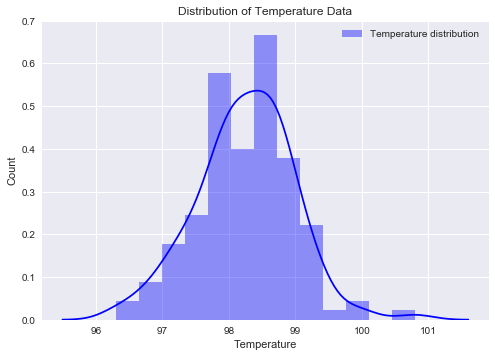

In [4]:
#Overlaying a kernel density estimate (KDE) to the temperature histogram
sns.distplot(temperature, color='B', kde=True, label='Temperature distribution')
plt.title('Distribution of Temperature Data')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend(loc=1)
plt.show()

In [5]:
print('Temperature Mean = ' + str(temperature.mean()))
print('Temperature Median = ' + str(temperature.median()))
print('Temperature Mode = ' + str(statistics.mode(temperature)))

Temperature Mean = 98.24923076923078
Temperature Median = 98.3
Temperature Mode = 98.0


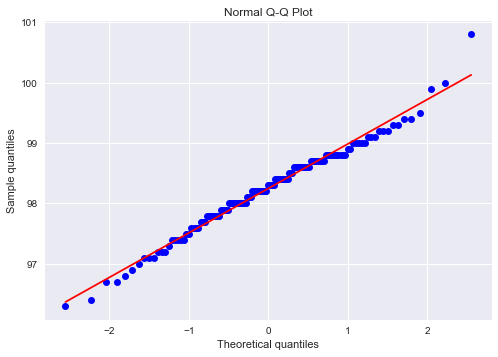

In [6]:
#QQ plot to determine the distribution of the data.
stats.probplot(temperature, dist="norm", plot=pylab)
pylab.title("Normal Q-Q Plot")
pylab.ylabel("Sample quantiles")
pylab.show()

In [7]:
#Test to determine if temperature is a normal distribution.
stats.normaltest(temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

**Question 1 Response:**  Visualization of the temperature variable indicates that the distribution is largely normal.  The mean, median, and mode are in close proximity to each other indicating a normal distribution. The execution of an normalcy test returns a p-value of 0.259 which is considered high (p > 0.05) confirms that the temperature variable is indeed a normal distribution.

### Question 2:  Is the sample size large?  Are the observations independent?

In [8]:
#Execution of a Pearson Correlation coefficient analysis
print(np.corrcoef(temperature, heart_rate))

[[ 1.         0.2536564]
 [ 0.2536564  1.       ]]


**Question 2 Response:**

A normally distributed sample size of [n ≥ 30](https://onlinecourses.science.psu.edu/stat500/book/export/html/25) is considered a good rule of thumb when using the [Central Limit Theorem](https://www.statisticalengineering.com/central_limit_theorem.htm) for data analysis.  Because the dataset consists of 130 observations, this is an adequate sample size.

I conducted a statistical test to measure whether the two variables, heart_rate and temperature are independent.  The Pearson correlation coefficient analysis yieled that a weak correlation of 0.253.  Because the Pearson correlation coefficient is very close to zero, it indicates that the variables heart_rate and temperature are largely independent of each other.  However, because the samples were taken from different individuals each meaurement bears no significant impact on the other, therefore heart_rate and temperature observations can be considered independent. 


### Question 3:  Is the true population mean really 98.6 degrees F? 
    - Would you use a one-sample or two-sample test? Why?
    - In this situation, is it appropriate to use the t or z statistic?
    - Now try using the other test. How is the result be different? Why? 

#### Question 3: Response

The mean temperature of the sample population is approximately 98.25$^{\circ}$F, a lower value which contradicts Carl Wunderlich's 120-year-old standard of 98.6$^{\circ}$F.  A one-sample test is more appropriate for this analysis because the data suggests that the true population mean may be lower than 98.6$^{\circ}$F.  Because we know the standard deviation of our sample population is 0.733183 and our sample size is n > 30, a z-test is also appropriate.  

#### One-sample Z-Test Hypothesis
    
 Defining the null and alternative hypothesis:  
$H_{0}$ =  The true population mean ($\mu$) is 98.6$^{\circ}$F  
$H_{a}$ =  The true population mean ($\mu$) is less than 98.6$^{\circ}$F


 Significance level ($\alpha$) and Confidence Interval (CI):  
$\alpha$ = 0.05  
CI = 0.95


In [9]:
print('The critical Z-Score value for a 95% Confidence Interval is ± ' + str(round(stats.norm.ppf(0.975),2)))

The critical Z-Score value for a 95% Confidence Interval is ± 1.96


Decision rule:  
If the z-statistic is < -1.96 or > 1.96, the null hypothesis ($H_{0}$) is rejected.

In [57]:
# Calculation of the Z-Statistic 
x = df.temperature.mean()
mu = 98.6
std = df.temperature.std()
n = len(df)

z = (x - mu)/(std / math.sqrt(n))
print('Z statistic:', round(z,2))

# CALCULATE P VALUE
p = stats.t.sf(np.abs(z), n-1)*2 
print('P-value:', p)

Z statistic: -5.45
P-value: 2.41063204156e-07


#### One-sample t-Test Hypothesis
    
 Defining the null and alternative hypothesis  
$H_{0}$ =  The true population mean ($\mu$) is 98.6$^{\circ}$F  
$H_{a}$ =  The true population mean ($\mu$) is less than 98.6$^{\circ}$F


 Significance level (($\alpha$) and Confidence Interval (CI)  
$\alpha$ = 0.05  
CI = 0.95

 Degrees of freedom (n-1) = 129 

In [11]:
print('The cricial T-value for a 95% Confidence Interval is ± ' + str(round(stats.t.ppf(1-0.025, 130),4)))

The cricial T-value for a 95% Confidence Interval is ± 1.9784


In [13]:
# CALCULATING THE T STATISTIC
x = df.temperature.mean()
mu = 98.6
std = df.temperature.std()
n = len(df)

t = (x - mu)/(std / math.sqrt(n))
print('T statistic:', t)

# CALCULATING THE P VALUE
p = stats.t.sf(np.abs(t), n-1)*2 
print('P value:', p)


T statistic: -5.454823292364079
P value: 2.41063204156e-07


#### Results:
The calculated Z-statistic of -5.45 is less that the z-statistics thereshold of -1.96, therefore we can reject the null hypothesis and conclude that 98.6$^{\circ}$F is not the true mean temperature.  Additionally, the calculated T-Statistic of -5.45 is less than the t-statistic threshold of -1.9784, we can reject the null hypothesis and also conclude that 98.6$^{\circ}$F is not the true mean temperature. 

### 4.  At what temperature should we consider someone's temperature to be "abnormal"?  

#### Question 4 Response:

In [68]:
print('Critical Z-Value: ', round(stats.norm.ppf(0.975), 2))

# CALCULATING THE MARGIN OF ERROR
std = df.temperature.std()
n = len(df.temperature)
moe = stats.norm.ppf(0.975) * (std / np.sqrt(n))
print('Margin of Error (moe):',moe)

# CALCULATE CONFIDENCE INTERVAL
mean = df['temperature'].mean()
ci = norm.interval(0.95, x, stats.sem(df.temperature))
print('Confidence Interval:', ci)


Critical Z-Value:  1.96
Margin of Error (moe): 0.126034341049
Confidence Interval: (98.123196428181657, 98.375265110279898)


From question 3 we obtained our Z-value threshold of 1.96, indicating that temperature whose z-score is above 1.96 or below -1.96 can be considered abnormal.  Using this as our basis, we are 95% confident that any temperature above 98.375$^{\circ}$F  or below 98.123$^{\circ}$F  can be considered an abnormal temperature.

### Question 5: Is there a significant difference between males and females in normal temperature?

    What test did you use and why?
    Write a story with your conclusion in the context of the original problem. 

In [69]:
#Separating the genders
males = df[df.gender == 'M']
females = df[df.gender == 'F']

print('There are ' + str(len(males)) + ' males' + ' and ' + str(len(females)) + ' females')

There are 65 males and 65 females


In [67]:
#Calculating the mean, variance and standard deviation foe each gender
m_mean = males.temperature.mean()
m_std = males.temperature.std()
m_var = males.temperature.std() ** 2
f_mean = females.temperature.mean()
f_std = females.temperature.std()
f_var = females.temperature.std() ** 2

print('Mean Normal Temperature (male): ' + str(m_mean))
print('Mean Normal Temperature (female): ' + str(f_mean))
print('Difference of means: ' + str(f_mean - m_mean))

Mean Normal Temperature (male): 98.1046153846154
Mean Normal Temperature (female): 98.39384615384613
Difference of means: 0.289230769230727


In [47]:
print('Temperature Standard Deviation (male): ' + str(m_std))
print('Temperature Standard Deviation (female):' + str(f_std))


Temperature Standard Deviation (male): 0.6987557623265908
Temperature Standard Deviation (female):0.7434877527313665


In [50]:
print('Temperature Variance (male): ' + str(m_var))
print('Temperature Variance (female):' + str(f_var))

Temperature Variance (male): 0.488259615384615
Temperature Variance (female):0.5527740384615375


#### Question 5 Response:  

For this analysis a **two-sample test** was utilized because 1) we are testing two sample populations which have independent means and 2) there is no indication as to whether a positive or negative normal temperature difference exists.  Additionally because the standard deviation for both samples is known and the sample sizes are of both samples is n > 30,  a **Z-test** is also appropriate.

 For this analysis the null hypothesis and alternative hypothesis are defined below:   
$H_{0}$:  male normal temperature = female normal temperature   
$H_{a}$:  male normal temperature ≠ female normal temperature

 Significance level ($\alpha$) and Confidence Interval (CI):  
$\alpha$ = 0.05  
CI = 0.95

In question 3 it was determined that the critical Z-Score value for a 95% Confidence Interval is ± 1.96.  Therefore, if the Z-statistic is < -1.96 or > 1.96, the null hypothesis ($H_{0}$) will be rejected.

In [70]:
z_stat = (f_mean - m_mean) / math.sqrt((f_var/len(females)) + (m_var/len(males)))
p_val = stats.t.sf(np.abs(z_stat), n-1)*2 # two-sided pvalue

print('Z-statistic: ' + str(z_stat))
print('P value:', p_val) 

Z-statistic: 2.285434538165274
P value: 0.0239190045195


The two-sample test analysis showed a z-statistic of approximately 2.285 which is above the critical z-score value of 1.96, additionally the calculated p-value of 0.0239 is below our alpha value of 0.05.  Based on these findings we can reject the null hypothesis and conclude that the mean temperature difference of 0.289$^{\circ}$F between males and females is statistically significant.